In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

inf=pd.read_excel("../kayitlarx.xlsx")
inf.pop("Unnamed: 0")
# inf.drop(0,axis=1,inplace=True)


0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [16]:
inf=inf.set_index(0)

KeyError: 'carID'

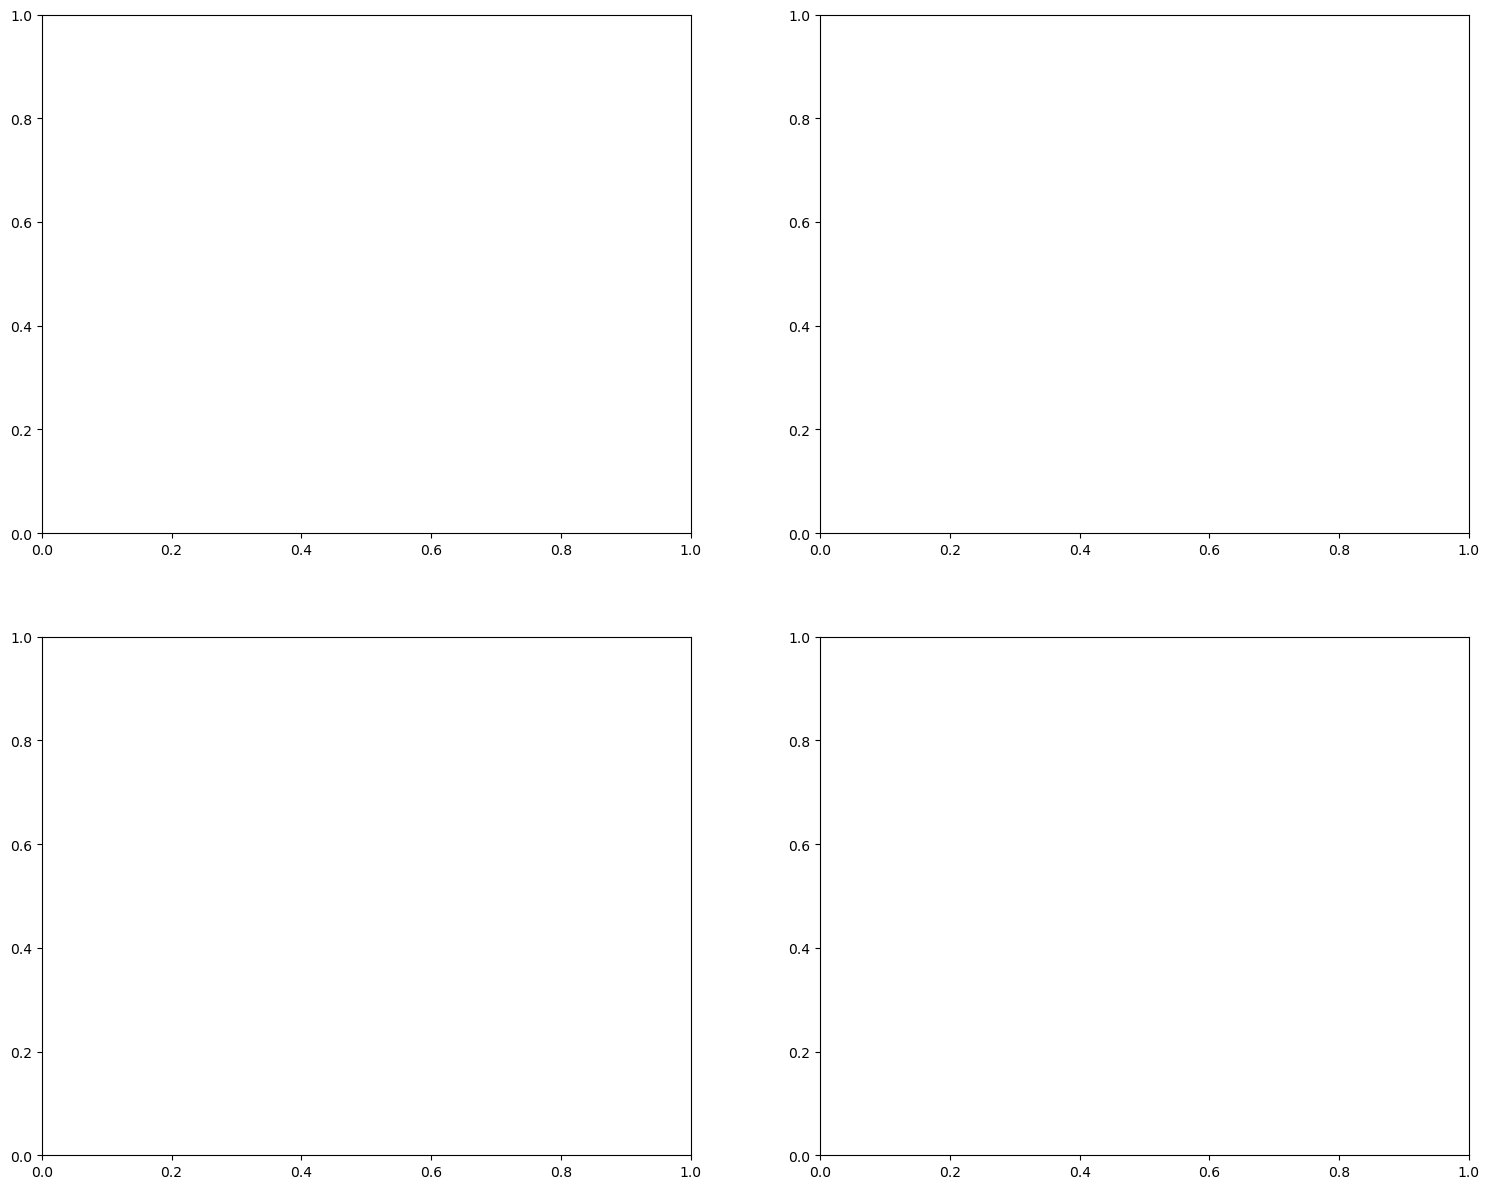

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(hspace=0.2, wspace=0.2)
axes[0,0].bar([i for i in range(len(np.array(inf.loc["carID"])))],np.array(inf.iloc["speed2"]),color="red")
axes[0,0].set_xlabel("Araç No")
axes[0,0].set_ylabel("Araçların Hızı")
axes[0,0].set_title("Araçların Hız Grafikleri")



In [18]:
inf.loc["speed2"]

1       52.20
2       42.72
3       61.85
4       55.90
5      110.11
        ...  
104     57.01
105     65.19
106     47.17
107     45.28
108     77.62
Name: speed2, Length: 108, dtype: float64

In [22]:
inf

,1,2,3,4,5,6,7,8,9,10,...,99,100,101,102,103,104,105,106,107,108
0,,,,,,,,,,,,,,,,,,,,,
carID,5.00,5.00,6.00,7.00,11.00,11.00,13.00,13.00,15.00,16.00,...,142.00,144.00,147.00,149.00,149.00,150.00,152.00,153.00,155.00,155.00
speed2,52.20,42.72,61.85,55.90,110.11,101.24,58.31,45.28,50.25,40.00,...,50.00,46.10,50.99,58.31,55.90,57.01,65.19,47.17,45.28,77.62
asma,49.15,22.06,76.70,59.72,214.61,189.26,66.60,29.36,43.57,14.29,...,42.86,31.71,45.69,66.60,59.72,62.88,86.26,34.77,29.36,121.77
ceza_tutar,3136.00,1508.50,6440.00,6440.00,6440.00,6440.00,6440.00,1508.50,3136.00,1508.50,...,3136.00,3136.00,3136.00,6440.00,6440.00,6440.00,6440.00,3136.00,1508.50,6440.00
hesaplanan_asma,30.00,10.00,50.00,50.00,50.00,50.00,50.00,10.00,30.00,10.00,...,30.00,30.00,30.00,50.00,50.00,50.00,50.00,30.00,10.00,50.00


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U6')) -> None

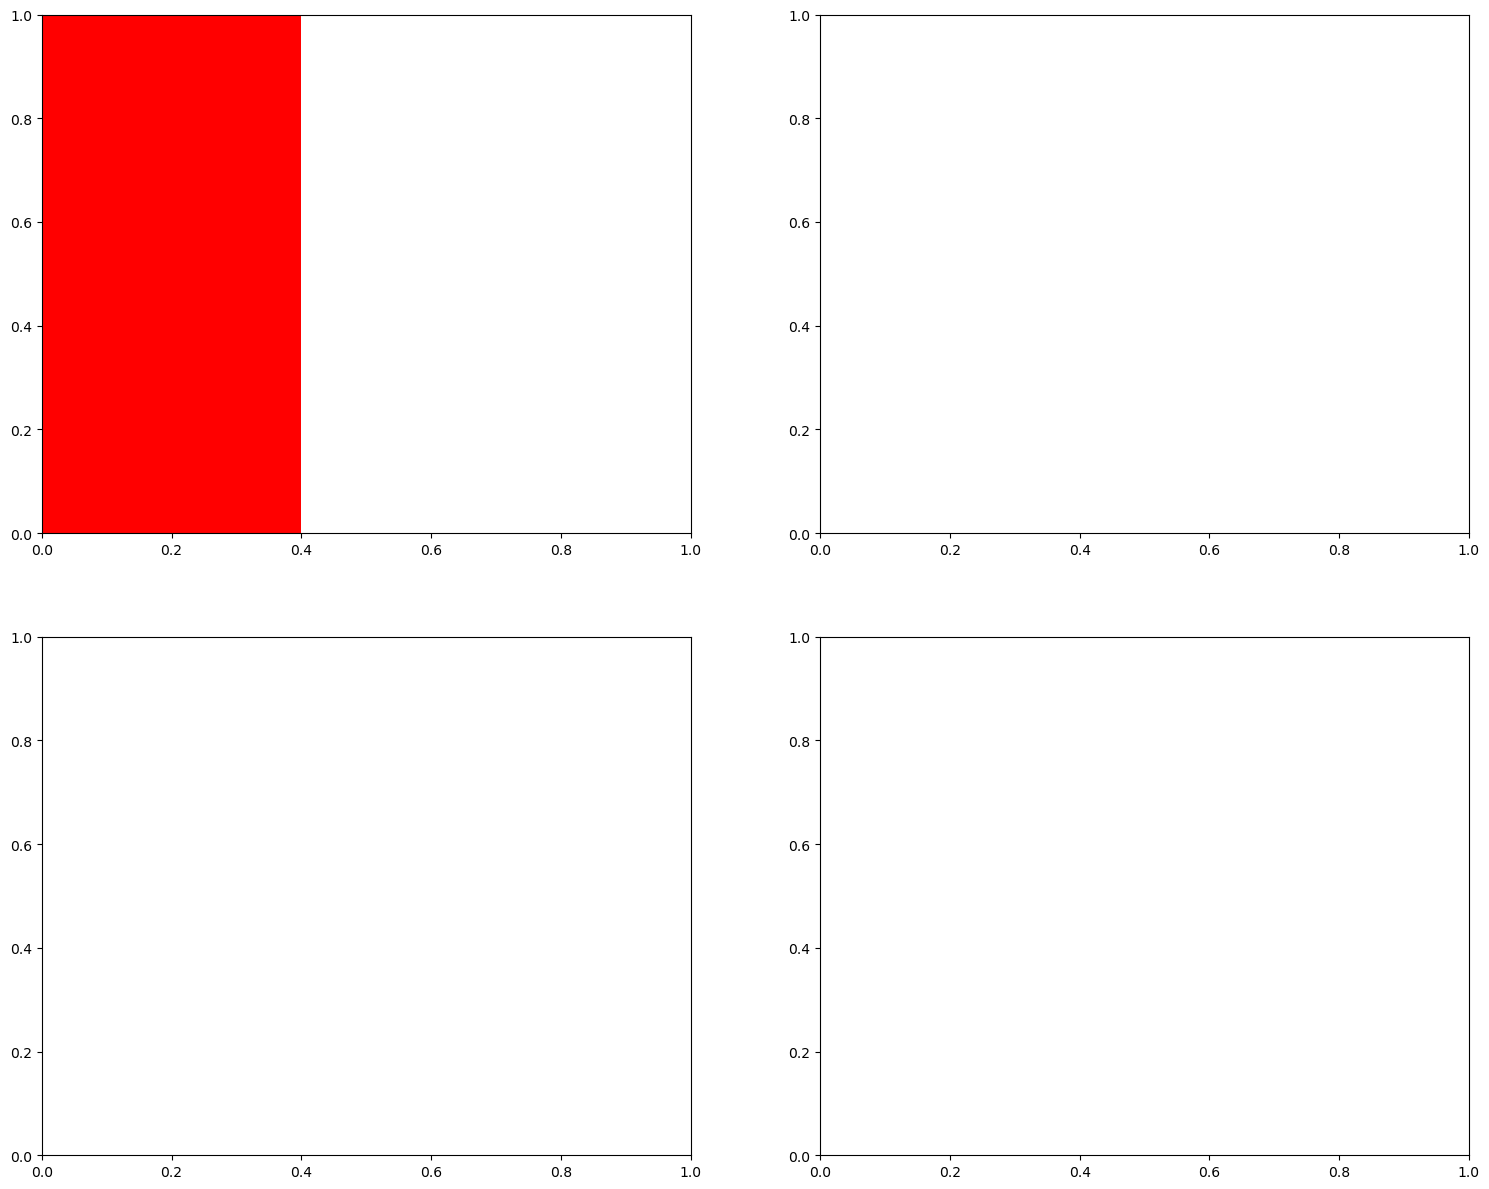

In [25]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from datetime import datetime
import os
import shutil
move="/home/bagergat/Desktop/Bitirme/used_files/"
# file="/home/bagergat/Desktop/graphsperminute.xlsx"
data=pd.read_excel("../kayitlarx.xlsx")
# data.drop("Unnamed: 0",axis=1,inplace=True)
# data.to_excel("/home/bagergat/Desktop/graphsperminute.xlsx")
# print(type(inf))
def create_graph(inf):
    root = tk.Tk()
    root.withdraw()

    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()

    small_window_width = int(screen_width * 1)
    small_window_height = screen_height
    small_window_x = screen_width - small_window_width
    small_window_y = 0

    small_window = tk.Toplevel(root)
    small_window.geometry(f"{small_window_width}x{small_window_height}+{small_window_x}+{small_window_y}")
    # fig, ax = plt.subplots()
    # ax.bar([i for i in range(len(np.array(inf.iloc[1])))], np.array(inf.iloc[1]), color="red")
    # ax.set_title('Grafik Başlığı')
    # ax.set_xlabel('X Ekseni')
    # ax.set_ylabel('Y Ekseni')

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    axes[0,0].bar([i for i in range(len(np.array(inf.iloc[2])))],np.array(inf.iloc[1]),color="red")
    axes[0,0].set_xlabel("Araç No")
    axes[0,0].set_ylabel("Araçların Hızı")
    axes[0,0].set_title("Araçların Hız Grafikleri")
    
    axes[0,1].bar([i for i in range(len(np.array(inf.iloc[2])))],np.array(inf.iloc[2]),color="green")
    axes[0,1].set_xlabel("Araç No")
    axes[0,1].set_ylabel("Aşma oranı")
    axes[0,1].set_title("Araçların Yasal Hız Sınırını Aşma Oranı")
    fig
    axes[1,0].bar([i for i in range(len(np.array(inf.iloc[3])))],np.array(inf.iloc[3]),color="brown")
    axes[1,0].set_xlabel("Araç No")
    axes[1,0].set_ylabel("Ceza Tutarı")
    axes[1,0].set_title("Araçlara Kesilen Ceza Tutarı")
    
    fiftyper=0
    thirtyper=0
    tenper=0
    for i in np.array(inf.loc[4]):
        if i==50:
            fiftyper+=1
        elif i==30:
            thirtyper+=1
        elif i==10:
            tenper+=1
    mylabels = ["%50 aşım sayısı","%30 aşım sayısı","%10 aşım sayısı"]
    axes[1,1].pie([fiftyper,thirtyper,tenper],labels=mylabels,colors=["red","orange","blue"])

    canvas = FigureCanvasTkAgg(fig, master=small_window)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=tk.YES)

    def close_window():
        small_window.destroy()
        root.destroy()  # Add this line to terminate the loop

    # Close the window after 45 seconds
    # if file:
        # os.remove(f"{move}"+"graphsperminute.xlsx")
        # shutil.move(f"{file}",f"{move}")
        
    root.after(55000, close_window)
    root.mainloop()
# simdi=datetime.now()
# x=1
# file="/home/bagergat/Desktop/graphsperminute.xlsx"
while True:
    # while file not in os.listdir("/home/bagergat/Desktop/"):
    #import mailattachmentdownloader
        # break
    # inf=pd.read_excel("./kayitlarx.xlsx")
    create_graph(data)
    
    
    # x+=1
    # os.remove(file)
    # print("2.döngü")
# while True:
#     # import mailattachmentdownloader
#     simdi2=datetime.now()
    # if simdi2.minute-simdi.minute==x:
        # print(f"{x}. grafik olusturuldu")
        
        # inf.pop("Unnamed: 0")
        # inf.pop(0)
        # inf.to_excel("./graphsperminute.xlsx")
        # inf = pd.read_excel("./graphsperminute.xlsx")
        

In [36]:
[i for i in range(1,len(np.array(inf.iloc[2])))]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107]

In [40]:
data.set_index(0,inplace=True)

In [41]:
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,,,,,,,,,,,,,,,,,,,,,
carID,0,5.00,5.00,6.00,7.00,11.00,11.00,13.00,13.00,15.00,...,142.00,144.00,147.00,149.00,149.00,150.00,152.00,153.00,155.00,155.00
speed2,1,52.20,42.72,61.85,55.90,110.11,101.24,58.31,45.28,50.25,...,50.00,46.10,50.99,58.31,55.90,57.01,65.19,47.17,45.28,77.62
asma,2,49.15,22.06,76.70,59.72,214.61,189.26,66.60,29.36,43.57,...,42.86,31.71,45.69,66.60,59.72,62.88,86.26,34.77,29.36,121.77
ceza_tutar,3,3136.00,1508.50,6440.00,6440.00,6440.00,6440.00,6440.00,1508.50,3136.00,...,3136.00,3136.00,3136.00,6440.00,6440.00,6440.00,6440.00,3136.00,1508.50,6440.00
hesaplanan_asma,4,30.00,10.00,50.00,50.00,50.00,50.00,50.00,10.00,30.00,...,30.00,30.00,30.00,50.00,50.00,50.00,50.00,30.00,10.00,50.00


In [43]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [44]:
data

,1,2,3,4,5,6,7,8,9,10,...,99,100,101,102,103,104,105,106,107,108
0,,,,,,,,,,,,,,,,,,,,,
carID,5.00,5.00,6.00,7.00,11.00,11.00,13.00,13.00,15.00,16.00,...,142.00,144.00,147.00,149.00,149.00,150.00,152.00,153.00,155.00,155.00
speed2,52.20,42.72,61.85,55.90,110.11,101.24,58.31,45.28,50.25,40.00,...,50.00,46.10,50.99,58.31,55.90,57.01,65.19,47.17,45.28,77.62
asma,49.15,22.06,76.70,59.72,214.61,189.26,66.60,29.36,43.57,14.29,...,42.86,31.71,45.69,66.60,59.72,62.88,86.26,34.77,29.36,121.77
ceza_tutar,3136.00,1508.50,6440.00,6440.00,6440.00,6440.00,6440.00,1508.50,3136.00,1508.50,...,3136.00,3136.00,3136.00,6440.00,6440.00,6440.00,6440.00,3136.00,1508.50,6440.00
hesaplanan_asma,30.00,10.00,50.00,50.00,50.00,50.00,50.00,10.00,30.00,10.00,...,30.00,30.00,30.00,50.00,50.00,50.00,50.00,30.00,10.00,50.00


In [45]:
data.to_excel("kayitlarx.xlsx")

In [3]:
inf.drop(0,axis=1,inplace=True)

In [4]:
inf

,1,2,3,4,5,6,7,8,9,10,...,99,100,101,102,103,104,105,106,107,108
0,5.00,5.00,6.00,7.00,11.00,11.00,13.00,13.00,15.00,16.00,...,142.00,144.00,147.00,149.00,149.00,150.00,152.00,153.00,155.00,155.00
1,52.20,42.72,61.85,55.90,110.11,101.24,58.31,45.28,50.25,40.00,...,50.00,46.10,50.99,58.31,55.90,57.01,65.19,47.17,45.28,77.62
2,49.15,22.06,76.70,59.72,214.61,189.26,66.60,29.36,43.57,14.29,...,42.86,31.71,45.69,66.60,59.72,62.88,86.26,34.77,29.36,121.77
3,3136.00,1508.50,6440.00,6440.00,6440.00,6440.00,6440.00,1508.50,3136.00,1508.50,...,3136.00,3136.00,3136.00,6440.00,6440.00,6440.00,6440.00,3136.00,1508.50,6440.00
4,30.00,10.00,50.00,50.00,50.00,50.00,50.00,10.00,30.00,10.00,...,30.00,30.00,30.00,50.00,50.00,50.00,50.00,30.00,10.00,50.00


In [6]:
inf.to_excel("../kayitlarx.xlsx")

In [8]:
data=pd.read_excel("./kayitlarx.xlsx")
data.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
data

,1,2,3,4,5,6,7,8,9,10,...,99,100,101,102,103,104,105,106,107,108
0,5.00,5.00,6.00,7.00,11.00,11.00,13.00,13.00,15.00,16.00,...,142.00,144.00,147.00,149.00,149.00,150.00,152.00,153.00,155.00,155.00
1,52.20,42.72,61.85,55.90,110.11,101.24,58.31,45.28,50.25,40.00,...,50.00,46.10,50.99,58.31,55.90,57.01,65.19,47.17,45.28,77.62
2,49.15,22.06,76.70,59.72,214.61,189.26,66.60,29.36,43.57,14.29,...,42.86,31.71,45.69,66.60,59.72,62.88,86.26,34.77,29.36,121.77
3,3136.00,1508.50,6440.00,6440.00,6440.00,6440.00,6440.00,1508.50,3136.00,1508.50,...,3136.00,3136.00,3136.00,6440.00,6440.00,6440.00,6440.00,3136.00,1508.50,6440.00
4,30.00,10.00,50.00,50.00,50.00,50.00,50.00,10.00,30.00,10.00,...,30.00,30.00,30.00,50.00,50.00,50.00,50.00,30.00,10.00,50.00
